before training V is:  [0.99488716 0.2557342  0.0279985  0.13589105]
before training PI is:  ['a2', 'a0', 'a0', 'a0']
after training V is:  [14.18496332 15.76117756 15.69730531 22.76646698]
after training PI is:  ['a1', 'a0', 'a0', 'a0']


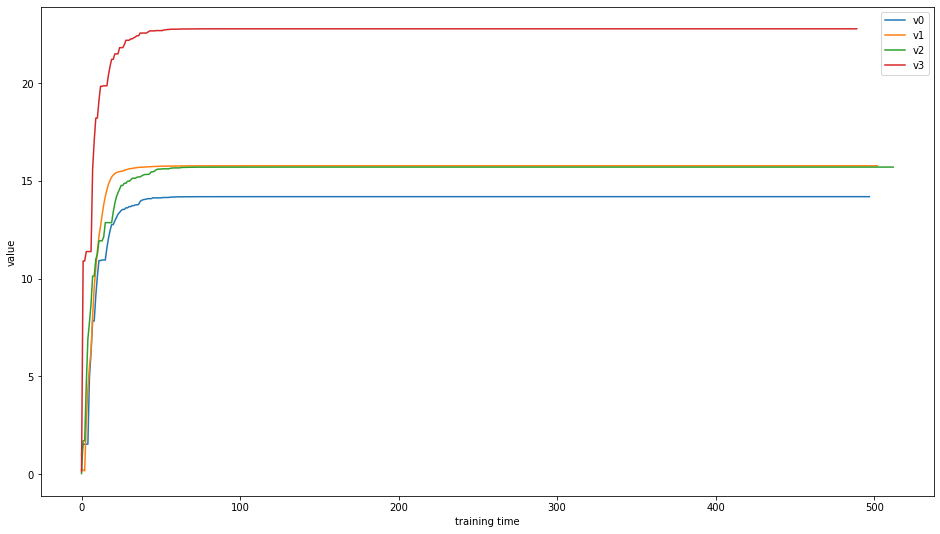

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

beta = 1e-4    # acceptable error
epochs = 2000  # number of training epoch

class rl:
    def __init__(self, x, y, kama):
        # available policies
        self.policies = np.array([['a1', 'a0', 'a0', 'a0'],
                                  ['a2', 'a0', 'a0', 'a0']])
        # a dictionary storing policy:transition_matrix pair
        self.transitions = {'a0': np.array([[0, 0, 0, 0],
                                           [0, 1 - x, 0, x],
                                           [1 - y, 0, 0, y],
                                           [1, 0, 0, 0]]),
                            'a1': np.array([[0, 1, 0, 0],
                                           [0, 0, 0, 0],
                                           [0, 0, 0, 0],
                                           [0, 0, 0, 0]]),      
                            'a2': np.array([[0, 0, 1, 0],
                                           [0, 0, 0, 0],
                                           [0, 0, 0, 0],
                                           [0, 0, 0, 0]])} 
        self.kama = kama                        # learning rate
        self.states = np.array([0, 1, 2, 3])    # possible states
        self.rewards = np.array([0, 0, 1, 10])  # rewards
        self.v = np.random.rand(4)              # initialize V values
        self.pi = ['a2', 'a0', 'a0', 'a0']      # initialize PI
        
    def update_v(self, state):
        """calculate and update V values"""
        max_sum = 0
        for p in self.policies[:, state]:
            transitions = self.transitions[p][state,:]
            new_max_sum = 0
            for t, vi in zip(transitions, self.v):
                new_max_sum += t * vi
            if new_max_sum > max_sum:
                self.pi[state] = p              # update PI
                max_sum = new_max_sum
        new_v = self.rewards[state] + self.kama * max_sum
        # update V value if it doesn't converge yet
        if abs(self.v[state] - new_v) > beta:
            self.v[state] = new_v
        return self.v[state]
    
    def train(self, epoch):
        # variable to store every training result, which will further used to plot
        list_state_values = [[self.v[0]], [self.v[1]], [self.v[2]], [self.v[3]]]
        print('before training V is: ', self.v)
        print('before training PI is: ', self.pi)
        for i in range(epoch):
            state = random.randint(0, 3)        # randomly initialize first state
            new_v = self.update_v(state)        # doing training, update V value
            list_state_values[state].append(new_v)
        print('after training V is: ', self.v)
        print('after training PI is: ', self.pi)
        # plot value change with respect to training time
        fig = plt.figure(figsize=(16, 9))
        plt.xlabel('training time')
        plt.ylabel('value')
        for i in range(len(self.v)):
            x = np.arange(len(list_state_values[i]))
            y = list_state_values[i]
            plt.plot(x, y, label="v"+str(i))
        plt.legend(loc='best')

a = rl(0.25, 0.25, 0.9)
a.train(epochs)

We can see from the above image, after 2000 training times, all the V values converge to **14.18496332, 15.76117756, 15.69730531, 22.76646698**, and the final PI is **a1, a0, a0, a0** respectively.